**CognoRise InfoTech**

**Machine Learning Internship**

**Task 3) Breast Cancer Prediction Model by ABU BAKAR SIDDIQ**

**This model Trains & Evaluates Several Machine Learning Models for Breast Cancer Prediction, including K-Nearest Neighbors, Random Forest, Decision Tree, Logistic Regression & Linear Regression. It preprocesses the data, measures model performance, and visualizes results through confusion matrices and prediction comparisons. It also provides a recommendation system to classify new patient data as either "Malignant" (cancerous) or "Benign" (non-cancerous)**

**Importing all Necessary Libraires**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import plotly.express as px

**Loading DataSet**

In [22]:
data=pd.read_csv('data.csv')

**Discovering DataSet**

In [23]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Dropping Unnecessary Columns**

In [24]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

**Encoding the 'Diagnosis' Column**

In [25]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

**Splitting Features & Target Variable**

In [26]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

**Splitting DataSet into Training & Testing Sets**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardizing the features**

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Initializing All The Models**

In [29]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression()
}

**Training & Evaluating All Models**

In [30]:
results = {}
for name, model in models.items():
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_binary = y_pred
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)
    
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

**Displaying Results**

In [31]:
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(metrics['classification_report'])
    print("\n")

Model: K-Nearest Neighbors
Accuracy: 0.95
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Model: Random Forest
Accuracy: 0.96
Confusion Matrix:
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Model: Decision Tree
Accuracy: 0.94
Confusion Matrix:
[[68  3]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   su

**Data Visualization**

In [37]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

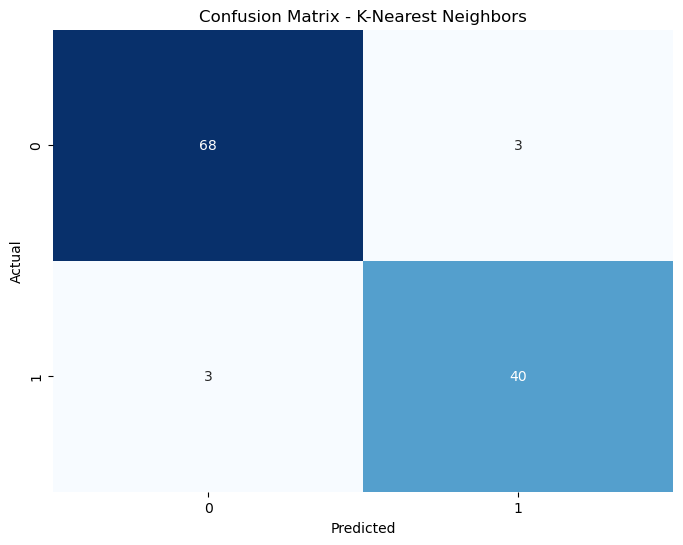

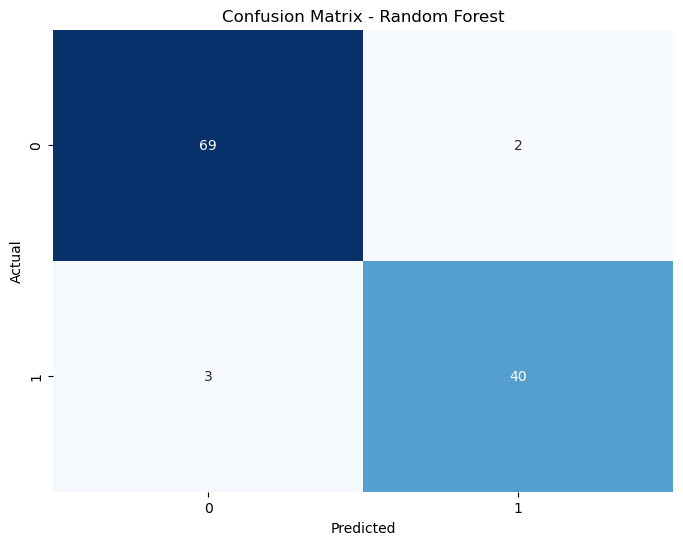

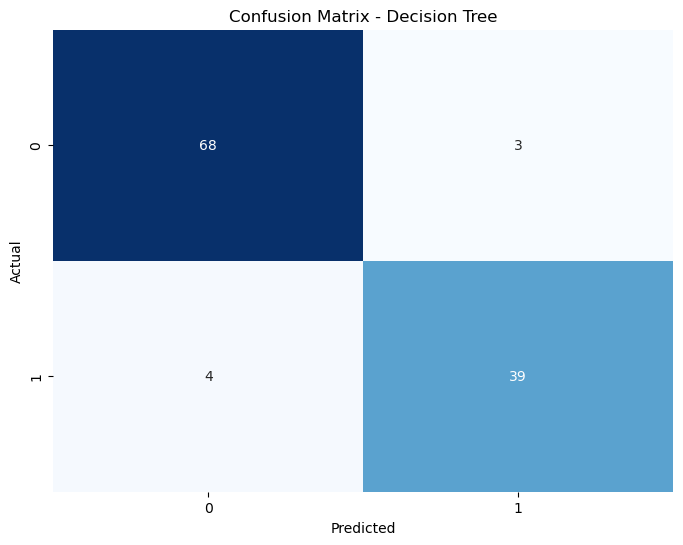

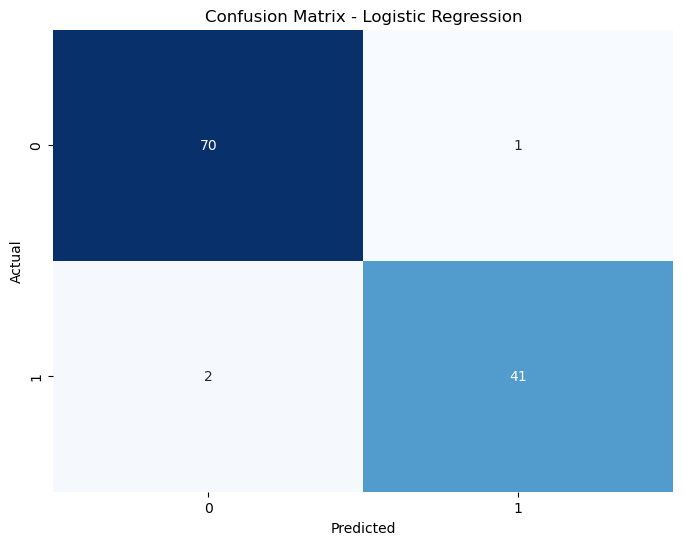

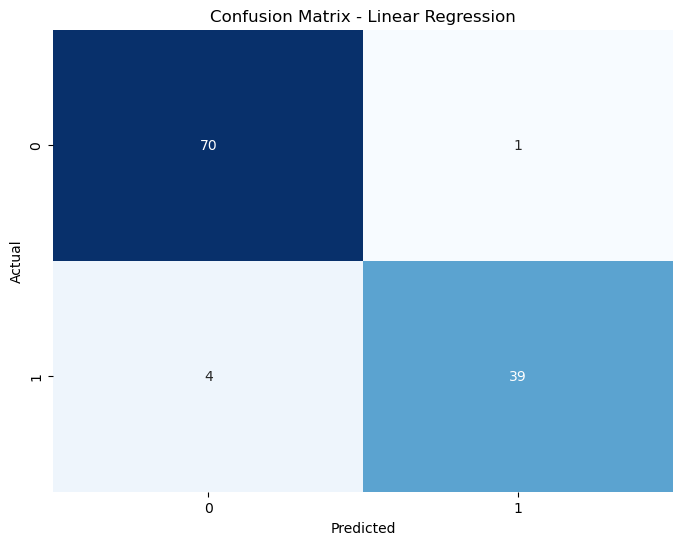

In [33]:
for name, metrics in results.items():
    plot_confusion_matrix(metrics['confusion_matrix'], name)

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.show()

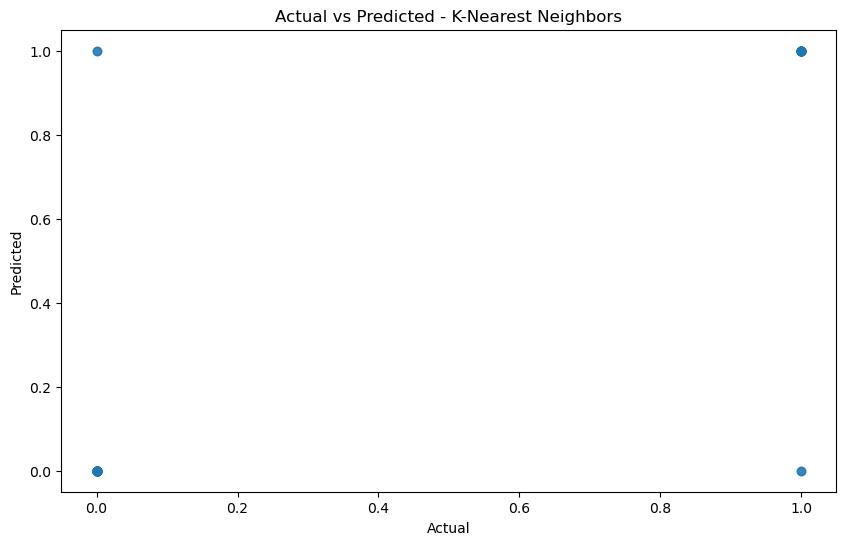

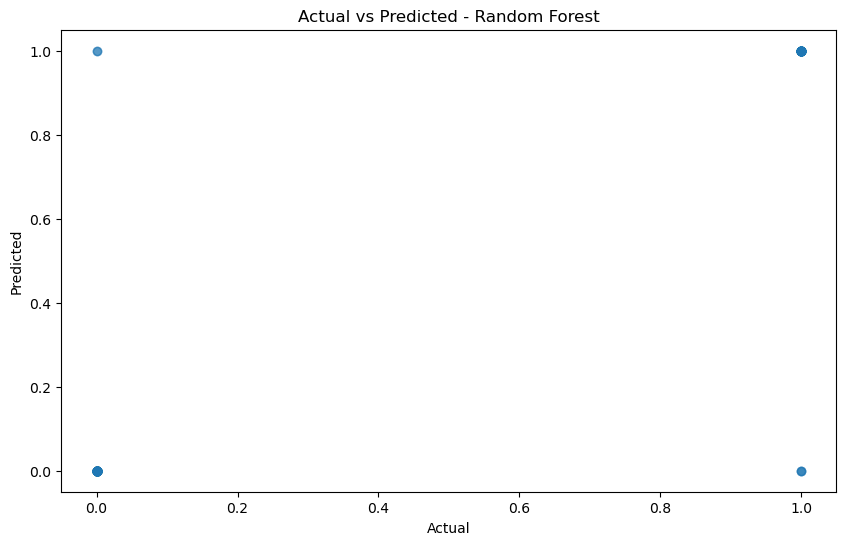

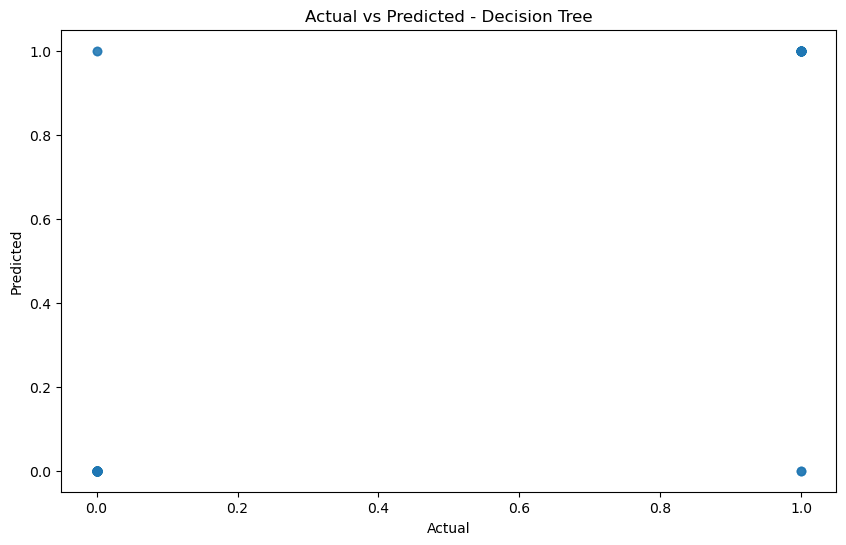

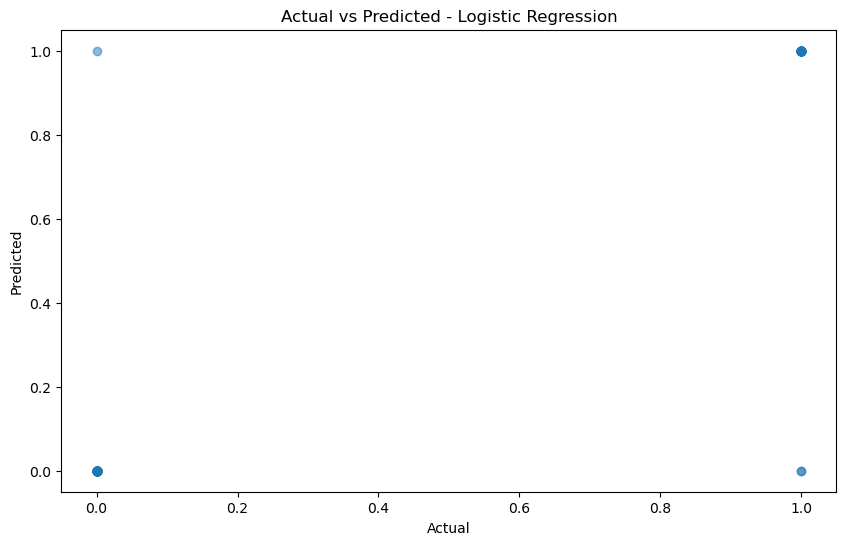

In [34]:
for name, metrics in results.items():
    if name != 'Linear Regression':
        y_pred = models[name].predict(X_test_scaled)
        plot_actual_vs_predicted(y_test, y_pred, name)

def plot_prediction_pie_chart(y_test, y_pred, model_name):
    correct = np.sum(y_test == y_pred)
    incorrect = np.sum(y_test != y_pred)
    sizes = [correct, incorrect]
    labels = ['Correct Predictions', 'Incorrect Predictions']
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
    plt.title(f'Correct vs Incorrect Predictions - {model_name}')
    plt.show()

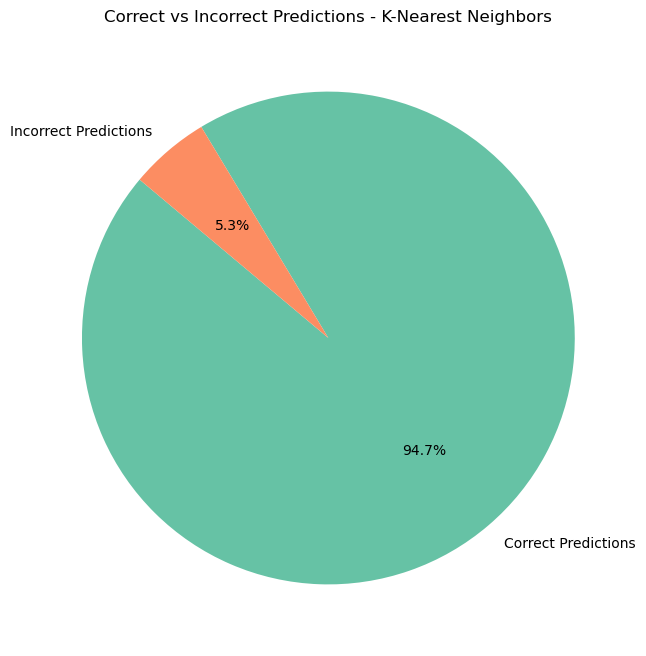

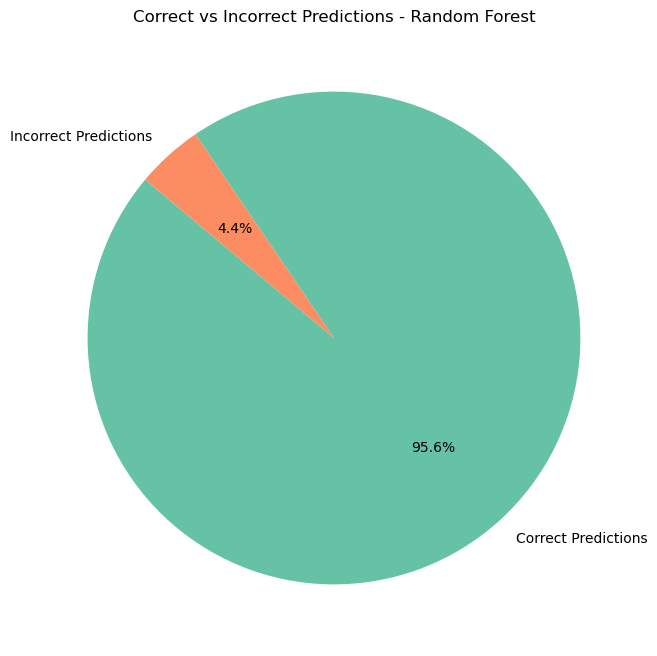

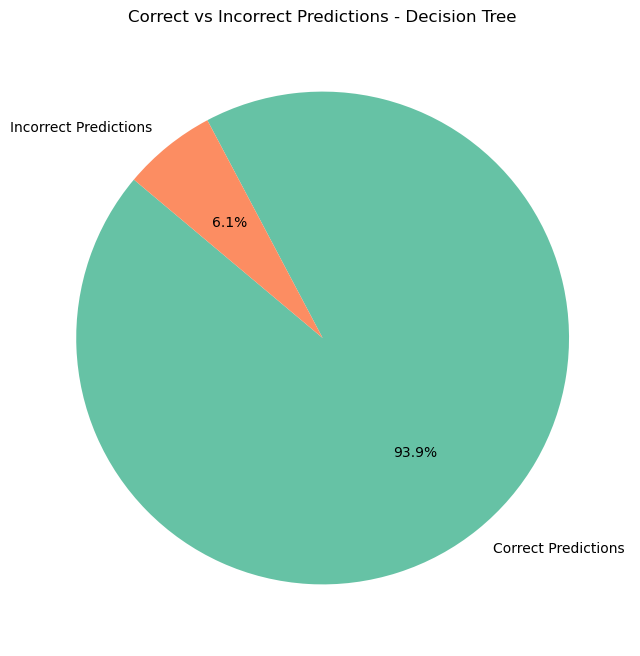

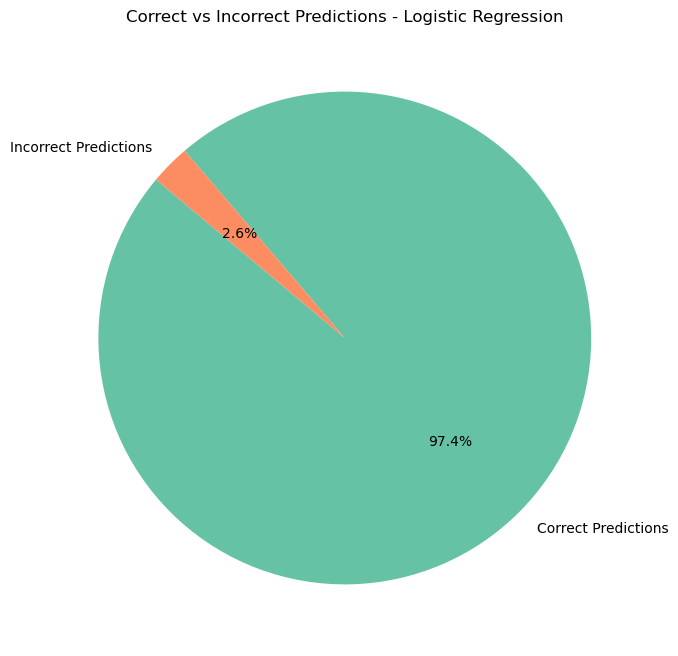

In [35]:
for name, metrics in results.items():
    if name != 'Linear Regression':
        y_pred = models[name].predict(X_test_scaled)
        plot_prediction_pie_chart(y_test, y_pred, name)

**Model will Predict based on User-Input either Patient have Breast Cancer or Not**

In [38]:
def recommend_cancer_prediction(radius_mean, texture_mean, perimeter_mean, area_mean):
    features_dict = {
        'radius_mean': [radius_mean],
        'texture_mean': [texture_mean],
        'perimeter_mean': [perimeter_mean],
        'area_mean': [area_mean],
        'smoothness_mean': [0],  
        'compactness_mean': [0],
        'concavity_mean': [0],
        'concave points_mean': [0],
        'symmetry_mean': [0],
        'fractal_dimension_mean': [0],
        'radius_se': [0],
        'texture_se': [0],
        'perimeter_se': [0],
        'area_se': [0],
        'smoothness_se': [0],
        'compactness_se': [0],
        'concavity_se': [0],
        'concave points_se': [0],
        'symmetry_se': [0],
        'fractal_dimension_se': [0],
        'radius_worst': [0],
        'texture_worst': [0],
        'perimeter_worst': [0],
        'area_worst': [0],
        'smoothness_worst': [0],
        'compactness_worst': [0],
        'concavity_worst': [0],
        'concave points_worst': [0],
        'symmetry_worst': [0],
        'fractal_dimension_worst': [0]
    }
    
    features_df = pd.DataFrame(features_dict)
    features_scaled = scaler.transform(features_df)
    
    predictions = {}
    
    for name, model in models.items():
        if name == 'Linear Regression':
            prediction = model.predict(features_scaled)
            prediction_binary = 'Malignant' if prediction > 0.5 else 'Benign'
        else:
            prediction_binary = model.predict(features_scaled)
            prediction_binary = 'Malignant' if prediction_binary == 1 else 'Benign'
        
        if prediction_binary == 'Malignant':
            predictions[name] = 'Patient has Breast Cancer, Please Consult with a Doctor.'
        else:
            predictions[name] = 'Patient is fine, No Breast Cancer Detected.'
    
    return predictions

print("Please Enter the Following Important Features to Know Either the Patient have Breast Cancer or Not:")
radius_mean = float(input("Radius Mean: "))
texture_mean = float(input("Texture Mean: "))
perimeter_mean = float(input("Perimeter Mean: "))
area_mean = float(input("Area Mean: "))

recommendations = recommend_cancer_prediction(radius_mean, texture_mean, perimeter_mean, area_mean)
print("Recommendations Based on the Input Features:")
for model, recommendation in recommendations.items():
    print(f"{model}: {recommendation}")


Please Enter the Following Important Features to Know Either the Patient have Breast Cancer or Not:


Radius Mean:  10
Texture Mean:  7
Perimeter Mean:  8
Area Mean:  5


Recommendations Based on the Input Features:
K-Nearest Neighbors: Patient is fine, No Breast Cancer Detected.
Random Forest: Patient is fine, No Breast Cancer Detected.
Decision Tree: Patient is fine, No Breast Cancer Detected.
Logistic Regression: Patient is fine, No Breast Cancer Detected.
Linear Regression: Patient is fine, No Breast Cancer Detected.
